In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [86]:
# list of file names in 2nd_test folder
datadir = '/content/drive/My Drive/2nd_test'


In [7]:
# look at one of the files
df = pd.read_csv('/content/drive/My Drive/2nd_test/2004.02.12.10.32.39', sep='\t', header=None)

In [8]:
df

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


# 1.

In [60]:
# create helper functions
def RMS(data):
    return (np.sum(data**2) / len(data)) ** 0.5

def variance(data):
    return (1 / (len(data) - 1)) * np.sum((data - data.mean()) ** 2)

def skewness(data):
    return (1 / (len(data) - 1)) * np.sum((data - data.mean()) ** 3)

def kurtosis(data):
    return (1 / (len(data) - 1)) * np.sum((data - data.mean()) ** 4)

def SF(data):
    return RMS(data) / (np.sum(np.abs(data)) / len(data))

def CF(data):
    return np.max(np.abs(data)) / RMS(data)

In [101]:
# extract features from each channel of each of the data files of Test set 2 and create dataset
RMS_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_RMS = df.apply(RMS).values.reshape(1, 4)
    df_RMS = pd.DataFrame(df_RMS)
    df_RMS.index = [file]
    RMS_data = RMS_data.append(df_RMS)
RMS_data.columns = ['RMS_1', 'RMS_2', 'RMS_3', 'RMS_4']    

In [104]:
variance_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_var = df.apply(variance).values.reshape(1, 4)
    df_var = pd.DataFrame(df_var)
    df_var.index = [file]
    variance_data = variance_data.append(df_var)    
variance_data.columns = ['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4']

In [106]:
skewness_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_skew = df.apply(skewness).values.reshape(1, 4)
    df_skew = pd.DataFrame(df_skew)
    df_skew.index = [file]
    skewness_data = skewness_data.append(df_skew)   
skewness_data.columns = ['SKEW_1', 'SKEW_2', 'SKEW_3', 'SKEW_4'] 

In [108]:
kurtosis_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_kurt = df.apply(kurtosis).values.reshape(1, 4)
    df_kurt = pd.DataFrame(df_kurt)
    df_kurt.index = [file]
    kurtosis_data = kurtosis_data.append(df_kurt)
kurtosis_data.columns = ['KURT_1', 'KURT_2', 'KURT_3', 'KURT_4']    

In [110]:
sf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_sf = df.apply(SF).values.reshape(1, 4)
    df_sf = pd.DataFrame(df_sf)
    df_sf.index = [file]
    sf_data = sf_data.append(df_sf)
sf_data.columns = ['SF_1', 'SF_2', 'SF_3', 'SF_4']    

In [112]:
cf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    df_cf = df.apply(CF).values.reshape(1, 4)
    df_cf = pd.DataFrame(df_cf)
    df_cf.index = [file]
    cf_data = cf_data.append(df_cf)
cf_data.columns = ['CF_1', 'CF_2', 'CF_3', 'CF_4'] 

In [114]:
# merge feature datasets into one
df_all = RMS_data.join(variance_data).join(skewness_data).join(kurtosis_data).join(sf_data).join(cf_data)

In [115]:
df_all

,RMS_1,RMS_2,RMS_3,RMS_4,VAR_1,VAR_2,VAR_3,VAR_4,SKEW_1,SKEW_2,SKEW_3,SKEW_4,KURT_1,KURT_2,KURT_3,KURT_4,SF_1,SF_2,SF_3,SF_4,CF_1,CF_2,CF_3,CF_4
2004.02.15.11.22.39,0.076572,0.091672,0.098691,0.054670,0.005861,0.008403,0.009738,0.002981,-0.000002,0.000084,-0.000045,-2.085019e-06,0.000120,0.000219,0.000389,0.000027,1.272373,1.256915,1.287567,1.255719,5.040986,4.897898,7.072547,4.463132
2004.02.15.11.12.39,0.077173,0.092865,0.101561,0.056888,0.005954,0.008616,0.010309,0.003228,0.000016,0.000083,0.000047,-1.031646e-05,0.000122,0.000236,0.000528,0.000034,1.274078,1.259455,1.296498,1.264448,4.716689,4.361162,10.141719,5.027386
2004.02.15.11.32.39,0.078226,0.094368,0.097266,0.056169,0.006116,0.008904,0.009460,0.003148,0.000015,0.000057,0.000008,7.049601e-07,0.000129,0.000253,0.000389,0.000031,1.270820,1.258394,1.297935,1.260943,4.959998,5.022910,6.374296,4.468633
2004.02.15.11.52.39,0.077383,0.093338,0.101264,0.054945,0.005985,0.008712,0.010253,0.003011,0.000010,0.000078,-0.000100,-4.056472e-06,0.000127,0.000242,0.000498,0.000028,1.272415,1.258847,1.294294,1.258964,5.737730,5.228320,8.482789,4.841238
2004.02.15.11.42.39,0.078215,0.092902,0.098975,0.055415,0.006114,0.008629,0.009793,0.003063,0.000023,0.000133,-0.000083,6.054116e-07,0.000123,0.000237,0.000497,0.000029,1.265850,1.259603,1.299059,1.258006,4.372547,4.542400,10.285443,3.915918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004.02.19.01.32.39,0.236143,0.136443,0.144436,0.095437,0.055762,0.018615,0.020861,0.009098,-0.002544,0.000048,0.000198,1.073205e-04,0.011232,0.000984,0.001326,0.000238,1.315970,1.242268,1.249060,1.243800,4.124611,3.701182,4.680280,4.013136
2004.02.19.01.52.39,0.221042,0.121892,0.126634,0.094005,0.048860,0.014856,0.016034,0.008828,-0.001218,0.000132,0.000111,-3.033009e-05,0.008273,0.000659,0.000802,0.000226,1.286666,1.250878,1.248239,1.247824,4.175679,4.282484,5.606700,4.106186
2004.02.19.02.12.39,0.261531,0.135034,0.127380,0.099534,0.068396,0.018231,0.016223,0.009901,-0.001835,-0.000092,0.000067,7.999558e-05,0.017869,0.001026,0.000838,0.000294,1.325908,1.256417,1.253686,1.256655,4.068348,4.087855,5.212737,3.677143
2004.02.19.02.02.39,0.207221,0.120711,0.121656,0.089168,0.042936,0.014570,0.014799,0.007943,-0.001432,0.000071,0.000082,-1.696289e-05,0.005841,0.000635,0.000716,0.000178,1.271692,1.252880,1.255992,1.240904,3.899216,4.912558,6.041621,3.745755


In [117]:
# transform data file index to datetime and sort by date
df_all.index = pd.to_datetime(df_all.index, format='%Y.%m.%d.%H.%M.%S')
df_all = df_all.sort_index()
df_all.head()

,RMS_1,RMS_2,RMS_3,RMS_4,VAR_1,VAR_2,VAR_3,VAR_4,SKEW_1,SKEW_2,SKEW_3,SKEW_4,KURT_1,KURT_2,KURT_3,KURT_4,SF_1,SF_2,SF_3,SF_4,CF_1,CF_2,CF_3,CF_4
2004-02-12 10:32:39,0.074179,0.090944,0.109404,0.054103,0.005399,0.008110,0.011758,0.002827,0.000033,0.000093,0.000261,-3.318425e-06,0.000106,0.000231,0.000859,0.000024,1.271660,1.266071,1.314254,1.256323,6.120331,5.640841,9.350652,4.879539
2004-02-12 10:42:39,0.075382,0.093419,0.109817,0.056101,0.005676,0.008721,0.012054,0.003133,0.000022,0.000057,-0.000032,2.775109e-07,0.000118,0.000247,0.000639,0.000031,1.277742,1.262276,1.300555,1.259563,5.147086,5.148852,6.847735,4.438435
2004-02-12 10:52:39,0.076230,0.093718,0.109861,0.056145,0.005805,0.008781,0.012067,0.003140,0.000015,0.000079,0.000075,1.239708e-05,0.000118,0.000255,0.000821,0.000032,1.265456,1.262645,1.309082,1.263337,6.598472,5.367171,8.492546,6.305078
2004-02-12 11:02:39,0.078724,0.092947,0.110667,0.056807,0.006193,0.008634,0.012238,0.003213,0.000020,0.000085,0.000045,-6.616623e-06,0.000159,0.000241,0.000851,0.000039,1.281033,1.258710,1.310246,1.260116,7.723217,6.121762,9.180734,9.241749
2004-02-12 11:12:39,0.078474,0.095348,0.107506,0.056841,0.006153,0.009089,0.011557,0.003224,0.000014,0.000085,-0.000004,3.479013e-06,0.000136,0.000267,0.000611,0.000033,1.278896,1.261110,1.297801,1.259820,4.982524,5.097120,7.171719,4.292680


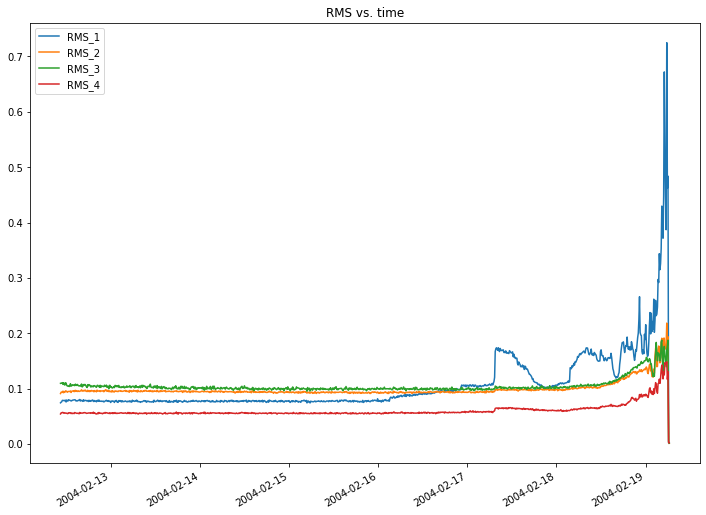

In [166]:
df_all.iloc[:, :4].plot(figsize=(12,9))
plt.title('RMS vs. time');

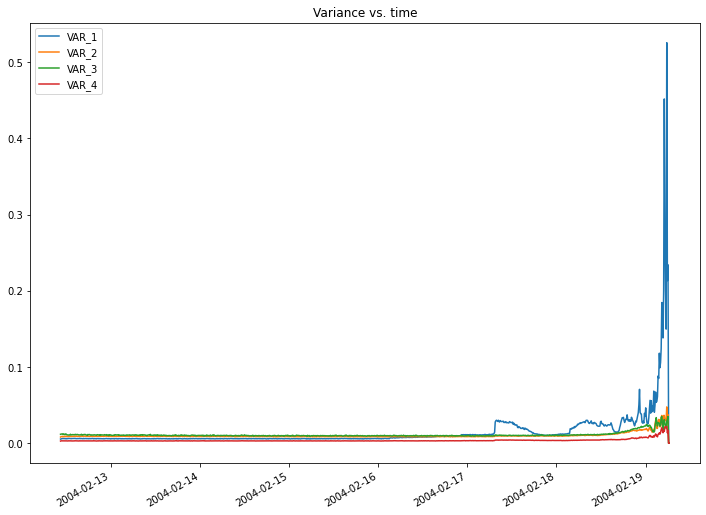

In [167]:
df_all.iloc[:, 4:8].plot(figsize=(12,9))
plt.title('Variance vs. time');

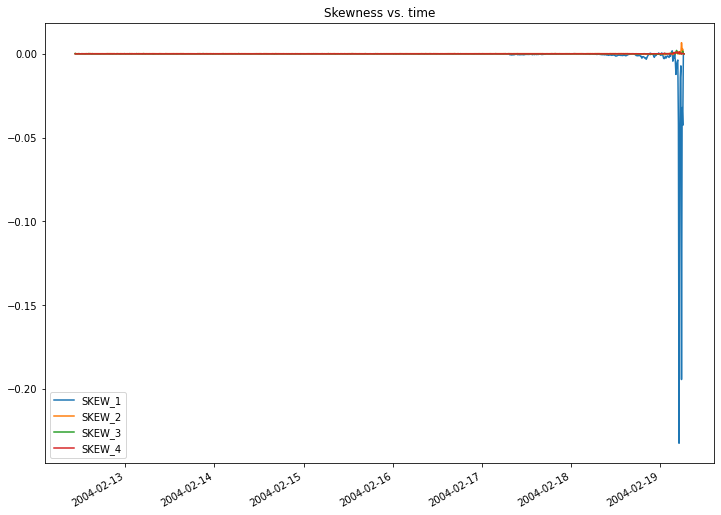

In [168]:
df_all.iloc[:, 8:12].plot(figsize=(12,9))
plt.title('Skewness vs. time');

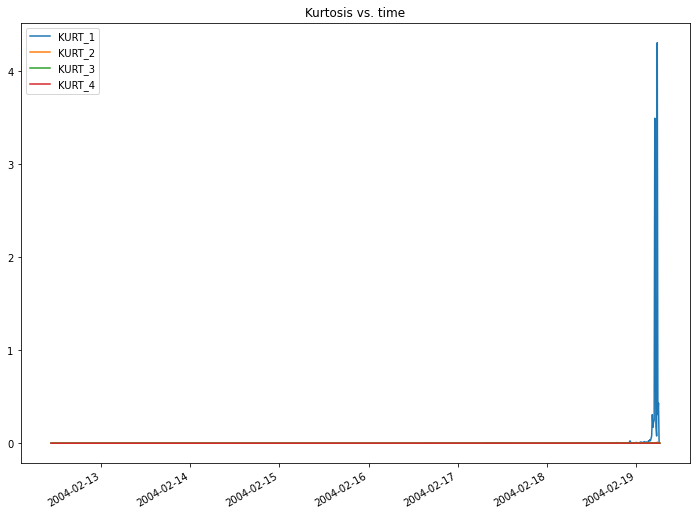

In [169]:
df_all.iloc[:, 12:16].plot(figsize=(12,9))
plt.title('Kurtosis vs. time');

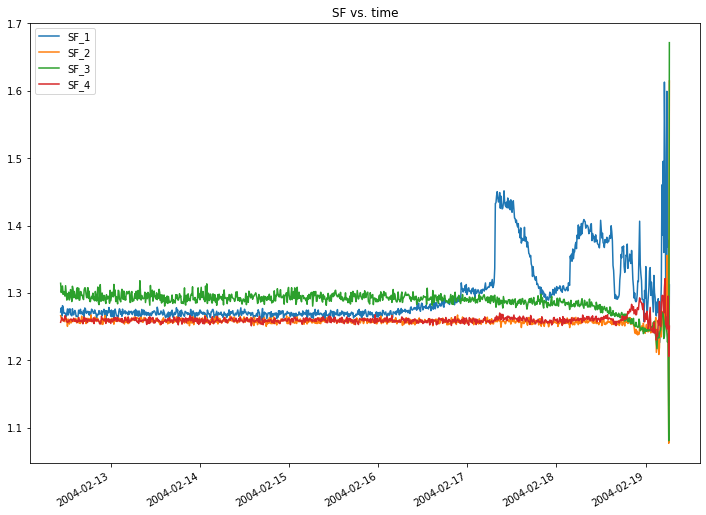

In [170]:
df_all.iloc[:, 16:20].plot(figsize=(12,9))
plt.title('SF vs. time');

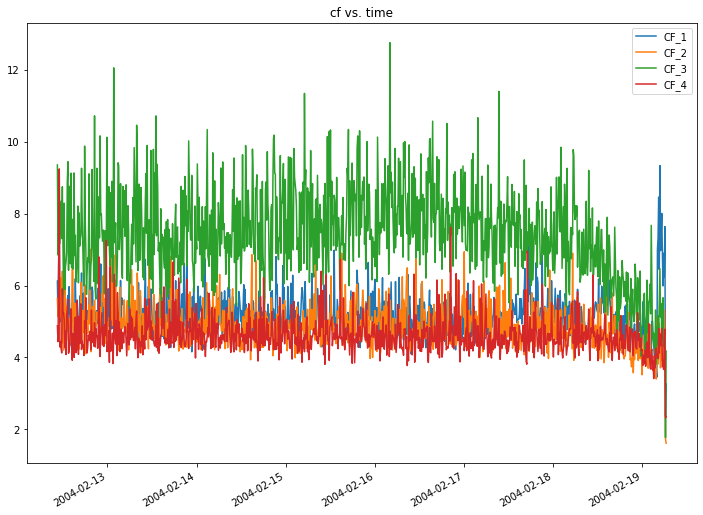

In [171]:
df_all.iloc[:, 20:24].plot(figsize=(12,9))
plt.title('cf vs. time');

Text(0.5, 0.98, 'Vibration signals histogram')

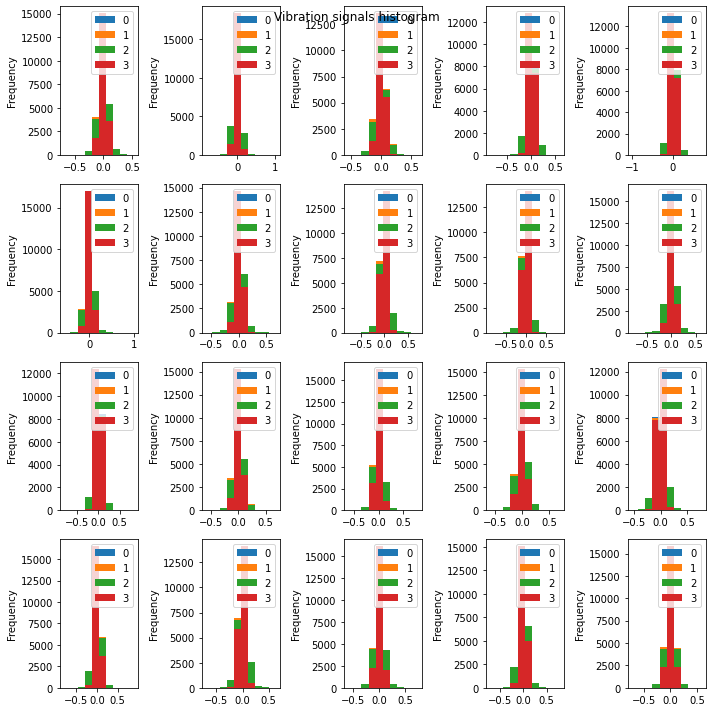

In [164]:
#plot vibration hists for every file
# we plot only first 20 files for convenience purpose 
# it is enough to see the pattern
fig=plt.figure(figsize=(10,10))
for i, file in enumerate(os.listdir(datadir)[:20]):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None)
    ax=fig.add_subplot(4,5,i+1)
    df.plot.hist(bins=10, ax=ax)
fig.tight_layout()
fig.suptitle('Vibration signals histogram')

## We have plotted two types of images: feature vs. time and histograms of vibration signals. We can see that for each channel signals are normally distributed with different mean and variance. We observe such data: mean3 > mean2 > mean1 > mean4. So the highest vibrations we observe in the third channel annd the lowest in the fourth. Looking at our feature plots we can conclude that for some period of time we see extreme values of these features for channel 1. Plots for other channels are similar. Useful for the RUL prediction task are the first 4 features(RMS, variance, skewness, kurtosis), because we can see well distinguished peaks at these plots. From cf plot we can't get such insights. But I consider that the most useful feature is SF, because we can see some anomalies before the failure (tendency of this feature is closest to the degradation process). Data normalization is almost always useful.

# 2.

## We make an assumption that last cycle is a failure cycle. As a target function we will use time to failure in hours.


In [205]:
# compute target feature
df_all['target'] = np.max((df_all.index - df_all.index[0]) /np.timedelta64(1, 'h')) - (df_all.index - df_all.index[0]) /np.timedelta64(1, 'h')

In [211]:
# train the model
# we try linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create model object
model = LinearRegression()
# fit only channel 1 data
model.fit(df_all[['RMS_1', 'VAR_1', 'SKEW_1', 'KURT_1', 'SF_1', 'CF_1']], df_all['target'])
# predict lifetime
target_pred = model.predict(df_all[['RMS_1', 'VAR_1', 'SKEW_1', 'KURT_1', 'SF_1', 'CF_1']])
# compute error
error = mean_squared_error(df_all['target'], target_pred)
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

MSE =  801.4954810539039
Predicted lifetime:  116.2281476343675


## We can see that our model predicts lower lifetime for bearing1 than true time. But its ok for such simple model.

In [213]:
# let's try all channels to predict the lifetime
model = LinearRegression()
# fit all channels  data
model.fit(df_all.iloc[:, :-1], df_all['target'])
# predict lifetime
target_pred = model.predict(df_all.iloc[:, :-1])
# compute error
error = mean_squared_error(df_all['target'], target_pred)
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

MSE =  325.27026995101505
Predicted lifetime:  170.4432179631467


## For info from all channels our model predicts higher lifetime but the error is lower.

In [217]:
# use random features subset - we will use every second feature
model = LinearRegression()
# fit random data
model.fit(df_all.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]], df_all['target'])
# predict lifetime
target_pred = model.predict(df_all.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]])
# compute error
error = mean_squared_error(df_all['target'], target_pred)
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

MSE =  512.1464572778028
Predicted lifetime:  135.4863267945052


## This result is better than result for channel1 features only. So we can conclude that info from other channels is valuable.

In [226]:
# try Lasso regression, this model penalizes the coefficients of the regression variables shrinking some of them to zero
# (some kind of feature selection)
from sklearn.linear_model import Lasso

model = Lasso()
# fit all channels  data
model.fit(df_all.iloc[:, :-1], df_all['target'])
# predict lifetime
target_pred = model.predict(df_all.iloc[:, :-1])
# compute error
error = mean_squared_error(df_all['target'], target_pred)
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

MSE =  1578.7016516785104
Predicted lifetime:  111.2982545365076


## We can observe very poor result and we can conclude that all data is valuable and feature selection leads to bad results.

In [237]:
# create dataset for test set 1
datadir1 = '/content/drive/My Drive/1st_test'

RMS_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_RMS = df.apply(RMS).values.reshape(1, 4)
    df_RMS = pd.DataFrame(df_RMS)
    df_RMS.index = [file]
    RMS_data1 = RMS_data1.append(df_RMS)
RMS_data1.columns = ['RMS1_1', 'RMS1_2', 'RMS1_3', 'RMS1_4']


In [238]:

variance_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_var = df.apply(variance).values.reshape(1, 4)
    df_var = pd.DataFrame(df_var)
    df_var.index = [file]
    variance_data1 = variance_data1.append(df_var)    
variance_data1.columns = ['VAR1_1', 'VAR1_2', 'VAR1_3', 'VAR1_4']

skewness_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_skew = df.apply(skewness).values.reshape(1, 4)
    df_skew = pd.DataFrame(df_skew)
    df_skew.index = [file]
    skewness_data1 = skewness_data1.append(df_skew)   
skewness_data1.columns = ['SKEW1_1', 'SKEW1_2', 'SKEW1_3', 'SKEW1_4']

kurtosis_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_kurt = df.apply(kurtosis).values.reshape(1, 4)
    df_kurt = pd.DataFrame(df_kurt)
    df_kurt.index = [file]
    kurtosis_data1 = kurtosis_data1.append(df_kurt)
kurtosis_data1.columns = ['KURT1_1', 'KURT1_2', 'KURT1_3', 'KURT1_4']

sf_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_sf = df.apply(SF).values.reshape(1, 4)
    df_sf = pd.DataFrame(df_sf)
    df_sf.index = [file]
    sf_data1 = sf_data1.append(df_sf)
sf_data1.columns = ['SF1_1', 'SF1_2', 'SF1_3', 'SF1_4']

cf_data1 = pd.DataFrame()
for file in os.listdir(datadir1):
    df = pd.read_csv(os.path.join(datadir1, file), sep='\t', header=None).iloc[:, :4]
    df_cf = df.apply(CF).values.reshape(1, 4)
    df_cf = pd.DataFrame(df_cf)
    df_cf.index = [file]
    cf_data1 = cf_data1.append(df_cf)
cf_data1.columns = ['CF1_1', 'CF1_2', 'CF1_3', 'CF1_4']    

df_all1 = RMS_data1.join(variance_data1).join(skewness_data1).join(kurtosis_data1).join(sf_data1).join(cf_data1)

df_all1.index = pd.to_datetime(df_all1.index, format='%Y.%m.%d.%H.%M.%S')
df_all1 = df_all1.sort_index()

df_all1['target'] = np.max((df_all1.index - df_all1.index[0]) /np.timedelta64(1, 'h')) - (df_all1.index - df_all1.index[0]) /np.timedelta64(1, 'h')
df_all1.head()

,RMS1_1,RMS1_2,RMS1_3,RMS1_4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,SKEW1_1,SKEW1_2,SKEW1_3,SKEW1_4,KURT1_1,KURT1_2,KURT1_3,KURT1_4,SF1_1,SF1_2,SF1_3,SF1_4,CF1_1,CF1_2,CF1_3,CF1_4,target
2003-10-22 12:06:24,0.124614,0.117493,0.130455,0.121642,0.006581,0.004991,0.008217,0.006008,-0.000016,0.000078,-0.000069,-0.000025,0.000176,0.000151,0.000217,0.000119,1.196555,1.172004,1.217490,1.192549,5.777850,5.966305,5.166521,4.357044,827.558889
2003-10-22 12:09:13,0.123811,0.116833,0.131490,0.122182,0.006323,0.004835,0.008147,0.005889,-0.000035,0.000043,-0.000075,-0.000015,0.000166,0.000117,0.000214,0.000114,1.194490,1.170047,1.215362,1.187130,5.282236,4.972931,4.905319,5.115330,827.511944
2003-10-22 12:14:13,0.125246,0.118384,0.131906,0.123572,0.006435,0.004825,0.008143,0.005944,-0.000021,0.000051,-0.000068,-0.000013,0.000165,0.000116,0.000213,0.000112,1.192411,1.165889,1.215179,1.187731,4.974196,4.637434,4.647262,3.495929,827.428611
2003-10-22 12:19:13,0.125197,0.119005,0.131614,0.122750,0.006533,0.005079,0.008149,0.005857,0.000003,0.000036,-0.000078,-0.000023,0.000172,0.000122,0.000212,0.000114,1.193522,1.171651,1.216958,1.187377,4.776455,4.495626,4.543583,3.934815,827.345278
2003-10-22 12:24:13,0.125618,0.119688,0.130779,0.121866,0.006730,0.005206,0.007897,0.005783,-0.000033,0.000036,-0.000065,-0.000020,0.000186,0.000113,0.000203,0.000112,1.198924,1.171257,1.211556,1.187478,4.959475,4.486647,5.543711,4.685479,827.261944


In [247]:
# retrain the best model and evaluate it on test set 1
model = Lasso(alpha=0.1)
# fit all channels  data
model.fit(df_all.iloc[:, :-1], df_all['target'])
# predict lifetime
target_pred = model.predict(df_all1.iloc[:, :-1])
# compute error
error = mean_squared_error(df_all1['target'], target_pred)
print('MSE = ', error)
print('Predicted lifetime for test set 1: ', target_pred[0])

MSE =  109829.0082767701
Predicted lifetime for test set 1:  120.74413844400243


## Our model performs very poor on test data from set1. This can happen due to the another distribution of data.

# 3.

In [252]:
# create dataset 0.1s window

RMS_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_RMS = df.apply(RMS).values.reshape(1, 4)
    df_RMS = pd.DataFrame(df_RMS)
    df_RMS.index = [file]
    RMS_data = RMS_data.append(df_RMS)
RMS_data.columns = ['RMS1_1', 'RMS1_2', 'RMS1_3', 'RMS1_4']



In [255]:

variance_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_var = df.apply(variance).values.reshape(1, 4)
    df_var = pd.DataFrame(df_var)
    df_var.index = [file]
    variance_data = variance_data.append(df_var)    
variance_data.columns = ['VAR1_1', 'VAR1_2', 'VAR1_3', 'VAR1_4']

skewness_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_skew = df.apply(skewness).values.reshape(1, 4)
    df_skew = pd.DataFrame(df_skew)
    df_skew.index = [file]
    skewness_data = skewness_data.append(df_skew)   
skewness_data.columns = ['SKEW1_1', 'SKEW1_2', 'SKEW1_3', 'SKEW1_4']

kurtosis_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_kurt = df.apply(kurtosis).values.reshape(1, 4)
    df_kurt = pd.DataFrame(df_kurt)
    df_kurt.index = [file]
    kurtosis_data = kurtosis_data.append(df_kurt)
kurtosis_data.columns = ['KURT1_1', 'KURT1_2', 'KURT1_3', 'KURT1_4']

sf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_sf = df.apply(SF).values.reshape(1, 4)
    df_sf = pd.DataFrame(df_sf)
    df_sf.index = [file]
    sf_data = sf_data.append(df_sf)
sf_data.columns = ['SF1_1', 'SF1_2', 'SF1_3', 'SF1_4']

cf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:2000, :]
    df_cf = df.apply(CF).values.reshape(1, 4)
    df_cf = pd.DataFrame(df_cf)
    df_cf.index = [file]
    cf_data = cf_data.append(df_cf)
cf_data.columns = ['CF1_1', 'CF1_2', 'CF1_3', 'CF1_4']    

df_all01 = RMS_data.join(variance_data).join(skewness_data).join(kurtosis_data).join(sf_data).join(cf_data)

df_all01.index = pd.to_datetime(df_all01.index, format='%Y.%m.%d.%H.%M.%S')
df_all01 = df_all01.sort_index()

df_all01['target'] = np.max((df_all01.index - df_all01.index[0]) /np.timedelta64(1, 'h')) - (df_all01.index - df_all01.index[0]) /np.timedelta64(1, 'h')
df_all01.head()

,RMS1_1,RMS1_2,RMS1_3,RMS1_4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,SKEW1_1,SKEW1_2,SKEW1_3,SKEW1_4,KURT1_1,KURT1_2,KURT1_3,KURT1_4,SF1_1,SF1_2,SF1_3,SF1_4,CF1_1,CF1_2,CF1_3,CF1_4,target
2004-02-12 10:32:39,0.072375,0.086653,0.108378,0.054291,0.005158,0.007281,0.011504,0.002883,0.000028,0.000101,0.000143,0.000015,0.000091,0.000173,0.000639,0.000024,1.266718,1.265061,1.289223,1.254084,4.186553,3.496709,6.578796,3.241780,163.833333
2004-02-12 10:42:39,0.076045,0.092152,0.108599,0.056977,0.005774,0.008491,0.011800,0.003239,-0.000079,0.000029,-0.000194,0.000005,0.000127,0.000249,0.000531,0.000036,1.288743,1.272086,1.295380,1.267024,4.812908,4.481703,4.631699,4.370151,163.666667
2004-02-12 10:52:39,0.077274,0.095000,0.108428,0.053292,0.005973,0.009025,0.011761,0.002832,0.000054,0.000206,-0.000101,0.000005,0.000130,0.000276,0.000711,0.000024,1.263840,1.268397,1.305587,1.242849,5.150523,5.168433,6.778712,3.490198,163.500000
2004-02-12 11:02:39,0.080506,0.095960,0.106084,0.059185,0.006478,0.009206,0.011255,0.003499,0.000088,0.000196,-0.000047,-0.000017,0.000159,0.000274,0.000522,0.000037,1.279666,1.260429,1.305862,1.255882,4.546226,4.376811,4.307896,3.666450,163.333333
2004-02-12 11:12:39,0.077908,0.090167,0.103279,0.056849,0.006073,0.008122,0.010668,0.003233,-0.000069,0.000091,0.000030,0.000014,0.000123,0.000213,0.000425,0.000036,1.270398,1.259265,1.276747,1.267015,4.800546,3.926042,4.754101,4.256888,163.166667


In [258]:
# train the model
# we try linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create model object
model = LinearRegression()
# fit only channel 1 data
model.fit(df_all01[['RMS1_1', 'VAR1_1', 'SKEW1_1', 'KURT1_1', 'SF1_1', 'CF1_1']], df_all01['target'])
# predict lifetime
target_pred = model.predict(df_all01[['RMS1_1', 'VAR1_1', 'SKEW1_1', 'KURT1_1', 'SF1_1', 'CF1_1']])
# compute error
error = mean_squared_error(df_all01['target'], target_pred)
print('0.1s window ')
print('Channel 1 data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

# let's try all channels to predict the lifetime
model = LinearRegression()
# fit all channels  data
model.fit(df_all01.iloc[:, :-1], df_all01['target'])
# predict lifetime
target_pred = model.predict(df_all01.iloc[:, :-1])
# compute error
error = mean_squared_error(df_all01['target'], target_pred)
print('0.1s window ')
print('All channels data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

# use random features subset - we will use every second feature
model = LinearRegression()
# fit random data
model.fit(df_all01.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]], df_all01['target'])
# predict lifetime
target_pred = model.predict(df_all01.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]])
# compute error
error = mean_squared_error(df_all01['target'], target_pred)
print('0.1s window ')
print('Random data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

0.1s window 
Channel 1 data
MSE =  798.9938214444835
Predicted lifetime:  113.84396255454357
0.1s window 
All channels data
MSE =  503.201458733534
Predicted lifetime:  135.81318232723578
0.1s window 
Random data
MSE =  574.2536918086038
Predicted lifetime:  139.62349573113045


In [259]:
# create dataset 0.5s window

RMS_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_RMS = df.apply(RMS).values.reshape(1, 4)
    df_RMS = pd.DataFrame(df_RMS)
    df_RMS.index = [file]
    RMS_data = RMS_data.append(df_RMS)
RMS_data.columns = ['RMS1_1', 'RMS1_2', 'RMS1_3', 'RMS1_4']


variance_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_var = df.apply(variance).values.reshape(1, 4)
    df_var = pd.DataFrame(df_var)
    df_var.index = [file]
    variance_data = variance_data.append(df_var)    
variance_data.columns = ['VAR1_1', 'VAR1_2', 'VAR1_3', 'VAR1_4']

skewness_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_skew = df.apply(skewness).values.reshape(1, 4)
    df_skew = pd.DataFrame(df_skew)
    df_skew.index = [file]
    skewness_data = skewness_data.append(df_skew)   
skewness_data.columns = ['SKEW1_1', 'SKEW1_2', 'SKEW1_3', 'SKEW1_4']

kurtosis_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_kurt = df.apply(kurtosis).values.reshape(1, 4)
    df_kurt = pd.DataFrame(df_kurt)
    df_kurt.index = [file]
    kurtosis_data = kurtosis_data.append(df_kurt)
kurtosis_data.columns = ['KURT1_1', 'KURT1_2', 'KURT1_3', 'KURT1_4']

sf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_sf = df.apply(SF).values.reshape(1, 4)
    df_sf = pd.DataFrame(df_sf)
    df_sf.index = [file]
    sf_data = sf_data.append(df_sf)
sf_data.columns = ['SF1_1', 'SF1_2', 'SF1_3', 'SF1_4']

cf_data = pd.DataFrame()
for file in os.listdir(datadir):
    df = pd.read_csv(os.path.join(datadir, file), sep='\t', header=None).iloc[:10000, :]
    df_cf = df.apply(CF).values.reshape(1, 4)
    df_cf = pd.DataFrame(df_cf)
    df_cf.index = [file]
    cf_data = cf_data.append(df_cf)
cf_data.columns = ['CF1_1', 'CF1_2', 'CF1_3', 'CF1_4']    

df_all02 = RMS_data.join(variance_data).join(skewness_data).join(kurtosis_data).join(sf_data).join(cf_data)

df_all02.index = pd.to_datetime(df_all02.index, format='%Y.%m.%d.%H.%M.%S')
df_all01 = df_all02.sort_index()

df_all02['target'] = np.max((df_all02.index - df_all02.index[0]) /np.timedelta64(1, 'h')) - (df_all02.index - df_all02.index[0]) /np.timedelta64(1, 'h')
df_all02.head()

,RMS1_1,RMS1_2,RMS1_3,RMS1_4,VAR1_1,VAR1_2,VAR1_3,VAR1_4,SKEW1_1,SKEW1_2,SKEW1_3,SKEW1_4,KURT1_1,KURT1_2,KURT1_3,KURT1_4,SF1_1,SF1_2,SF1_3,SF1_4,CF1_1,CF1_2,CF1_3,CF1_4,target
2004-02-15 11:22:39,0.075827,0.091618,0.097348,0.054749,0.005748,0.008392,0.009473,0.002992,-0.000012,0.000097,-0.000035,-4.050503e-06,0.000116,0.000222,0.000371,0.000027,1.270325,1.261089,1.287965,1.253849,4.668509,4.660681,6.266156,4.054873,91.000000
2004-02-15 11:12:39,0.077997,0.093897,0.101473,0.055937,0.006082,0.008809,0.010295,0.003124,0.000011,0.000084,0.000174,-3.502510e-06,0.000127,0.000249,0.000563,0.000031,1.271274,1.264484,1.297600,1.262016,4.666870,4.004408,10.150522,5.112911,91.166667
2004-02-15 11:32:39,0.078570,0.094628,0.097093,0.056017,0.006171,0.008953,0.009427,0.003135,0.000026,0.000075,0.000007,2.943556e-07,0.000132,0.000253,0.000386,0.000031,1.273239,1.256448,1.295909,1.259066,4.480087,5.009102,6.385649,4.230861,90.833333
2004-02-15 11:52:39,0.076018,0.094140,0.103773,0.054378,0.005775,0.008862,0.010769,0.002953,0.000010,0.000081,-0.000086,-1.031449e-06,0.000115,0.000250,0.000585,0.000028,1.272076,1.261528,1.299617,1.261133,5.038275,4.482686,7.930800,4.891692,90.500000
2004-02-15 11:42:39,0.077468,0.093144,0.096529,0.055780,0.005999,0.008672,0.009316,0.003105,0.000002,0.000130,0.000058,4.309011e-07,0.000118,0.000240,0.000381,0.000030,1.265762,1.260482,1.292789,1.259869,4.027448,4.036774,7.355280,3.890252,90.666667


In [260]:
# train the model
# we try linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# create model object
model = LinearRegression()
# fit only channel 1 data
model.fit(df_all02[['RMS1_1', 'VAR1_1', 'SKEW1_1', 'KURT1_1', 'SF1_1', 'CF1_1']], df_all02['target'])
# predict lifetime
target_pred = model.predict(df_all02[['RMS1_1', 'VAR1_1', 'SKEW1_1', 'KURT1_1', 'SF1_1', 'CF1_1']])
# compute error
error = mean_squared_error(df_all02['target'], target_pred)
print('0.5s window ')
print('Channel 1 data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

# let's try all channels to predict the lifetime
model = LinearRegression()
# fit all channels  data
model.fit(df_all02.iloc[:, :-1], df_all02['target'])
# predict lifetime
target_pred = model.predict(df_all02.iloc[:, :-1])
# compute error
error = mean_squared_error(df_all02['target'], target_pred)
print('0.5s window ')
print('All channels data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

# use random features subset - we will use every second feature
model = LinearRegression()
# fit random data
model.fit(df_all02.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]], df_all02['target'])
# predict lifetime
target_pred = model.predict(df_all02.iloc[:, [0,2,4,6,8,10,12,14,16,18,20]])
# compute error
error = mean_squared_error(df_all02['target'], target_pred)
print('0.5s window ')
print('Random data')
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

0.5s window 
Channel 1 data
MSE =  799.6666880775526
Predicted lifetime:  108.37992250594736
0.5s window 
All channels data
MSE =  386.70172394693446
Predicted lifetime:  104.19350475735712
0.5s window 
Random data
MSE =  534.2815973734955
Predicted lifetime:  109.9808848743138


## We have experimented with two different smaller windows: 0.1s and 0.5s. We observe that the model performs worse in both cases. Computing features over 0.1s window we get slightly better results than over 0.5s window. We can conclude that if we use all features we get the best result, this trend is observed for all windows. So in this case if we have more features we get better results.

# 4.

In [290]:
# use abrupt change method to detect possible concept drift
# we split the data into train and test sets
# then we compare loss on the test set with
# the loss of multiple test sets of the same size obtained
# by random shuffling of the examples
train = df_all.iloc[:884, :-1]
train_target = df_all.iloc[:884, -1]
test = df_all.iloc[884:, :-1]
test_target = df_all.iloc[884:, -1]
# create several test sets
# 1
set1 = df_all.sample(frac=1) # shuffle data
train1 = set1.iloc[:884, :-1]
train_target1 = set1.iloc[:884, -1]
test1 = set1.iloc[884:, :-1]
test_target1 = set1.iloc[884:, -1]

# 2
set2 = df_all.sample(frac=1) # shuffle data
train2 = set2.iloc[:884, :-1]
train_target2 = set2.iloc[:884, -1]
test2 = set2.iloc[884:, :-1]
test_target2 = set2.iloc[884:, -1]

# 3
set3 = df_all.sample(frac=1) # shuffle data
train3 = set3.iloc[:884, :-1]
train_target3 = set3.iloc[:884, -1]
test3 = set3.iloc[884:, :-1]
test_target3 = set3.iloc[884:, -1]


In [291]:
model = LinearRegression()
# fit all channels  data
model.fit(train, train_target)
# predict lifetime
target_pred = model.predict(test)
# compute error
error = mean_squared_error(test_target, target_pred)
print('MSE = ', error)
print('Predicted lifetime: ', target_pred[0])

target_pred1 = model.predict(test1)
# compute error
error1 = mean_squared_error(test_target1, target_pred1)
print('test1')
print('MSE = ', error1)
print('Predicted lifetime: ', target_pred1[0])

target_pred2 = model.predict(test2)
# compute error
error2 = mean_squared_error(test_target2, target_pred2)
print('test2')
print('MSE = ', error2)
print('Predicted lifetime: ', target_pred2[0])

target_pred3 = model.predict(test3)
# compute error
error3 = mean_squared_error(test_target2, target_pred3)
print('test3')
print('MSE = ', error3)
print('Predicted lifetime: ', target_pred3[0])

MSE =  1106545.200935231
Predicted lifetime:  13.245232221162496
test1
MSE =  696.267961291762
Predicted lifetime:  95.71022568836179
test2
MSE =  541260.6242858804
Predicted lifetime:  115.58976847399299
test3
MSE =  466557.643978093
Predicted lifetime:  119.9028419677079


##  The intuition behind this scheme is that if no concept change has occurred, the prediction on the ordered split should not deviate too much from that of the shuffled splits. In our case we can observe huge difference between losses. This simple method shows us that we have drift in the data. This method works if the model has algorithmic stability. Drift in the data could be the reason of so poor results of the best model, because so simple model as linear regression can't take into account  this drift.